In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('screentime_analysis.csv')

In [6]:
df

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16
...,...,...,...,...,...
195,2024-08-10,LinkedIn,22,12,5
196,2024-08-23,LinkedIn,5,7,1
197,2024-08-18,LinkedIn,19,2,5
198,2024-08-26,LinkedIn,21,14,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             200 non-null    datetime64[ns]
 1   App              200 non-null    object        
 2   Usage (minutes)  200 non-null    int64         
 3   Notifications    200 non-null    int64         
 4   Times Opened     200 non-null    int64         
 5   day_name         200 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 9.5+ KB


In [13]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Usage (minutes),200.0,37.750,29.711299,1.0,17.00,26.0,51.25,119.0
Notifications,200.0,28.735,35.801726,0.0,1.75,11.5,47.00,147.0
Times Opened,200.0,21.630,24.273010,1.0,4.00,10.0,32.00,99.0


In [37]:
# screen time

# Average screen time per app: ~37.75 minutes.
    
# Maximum usage: 119 minutes.

# 75% of app usages are below 51.25 minutes.


In [38]:
#Notifications:

# Average notifications per app: 28.73.

# Maximum notifications received for an app: 147.

# 25% of apps receive less than 2 notifications.


In [39]:
# Times Opened:

# Apps are opened on average 21.63 times per day.

# The most frequently opened app was opened 99 times in a day.


In [9]:
df.shape

(200, 5)

In [14]:
df.isnull().sum()

Date               0
App                0
Usage (minutes)    0
Notifications      0
Times Opened       0
dtype: int64

In [15]:
df.nunique()

Date               30
App                 8
Usage (minutes)    81
Notifications      76
Times Opened       62
dtype: int64

In [16]:
# Converting Date to Datetime Format and Getting Day Name



In [26]:
df['Date']=pd.to_datetime(df['Date'])


In [27]:
# Check for duplicates
duplicates = df.duplicated().sum()

In [28]:
# Display number of duplicates found
duplicates

0

In [29]:
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened,day_name
0,2024-08-07,Instagram,81,24,57,Wednesday
1,2024-08-08,Instagram,90,30,53,Thursday
2,2024-08-26,Instagram,112,33,17,Monday
3,2024-08-22,Instagram,82,11,38,Thursday
4,2024-08-12,Instagram,59,47,16,Monday


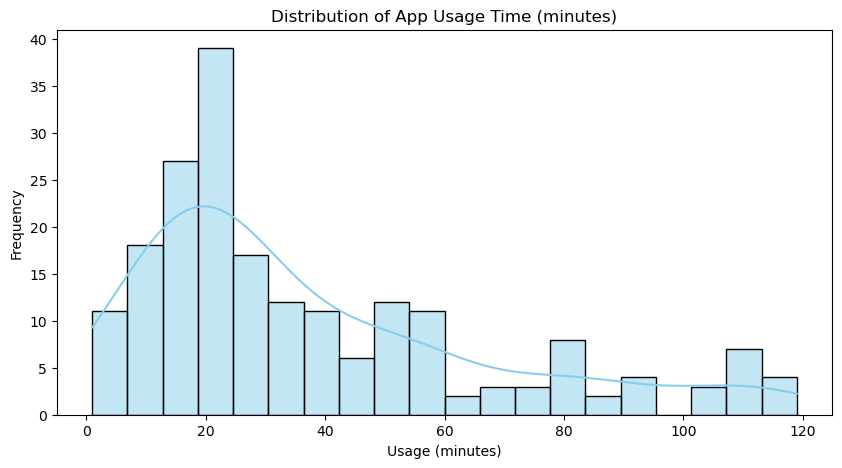

In [41]:
#  1: Distribution of Usage (minutes)

plt.figure(figsize=(10, 5))
sns.histplot(df["Usage (minutes)"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of App Usage Time (minutes)")
plt.xlabel("Usage (minutes)")
plt.ylabel("Frequency")
plt.show()

In [43]:
# The histogram shows that most app usage durations are below 50 minutes, but there are some cases of heavy usage exceeding 100 minutes



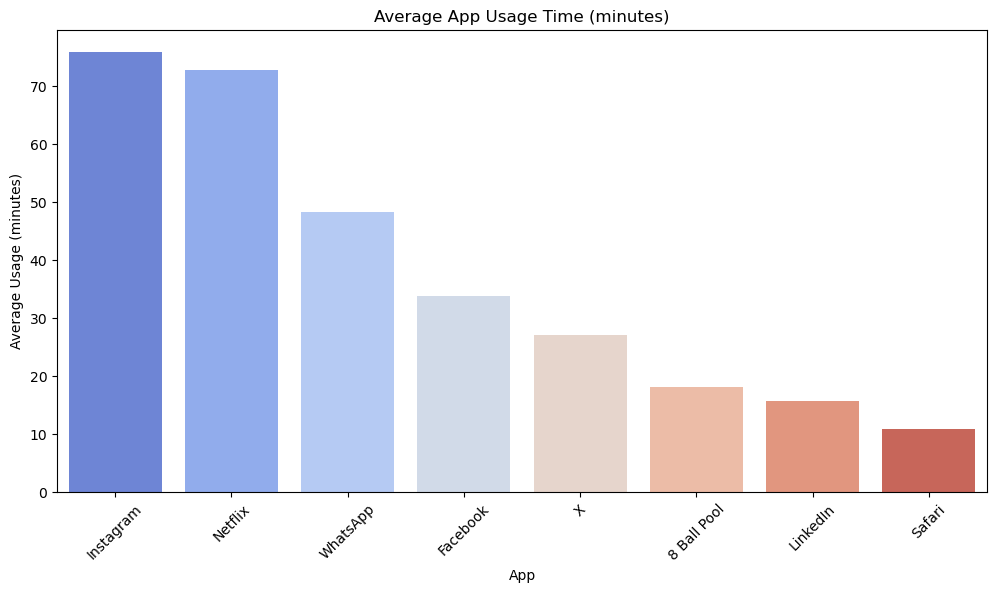

In [44]:
# Visualization 2: Average usage per app

plt.figure(figsize=(12, 6))
app_usage = df.groupby("App")["Usage (minutes)"].mean().sort_values(ascending=False)
sns.barplot(x=app_usage.index, y=app_usage.values, palette="coolwarm")
plt.title("Average App Usage Time (minutes)")
plt.xlabel("App")
plt.ylabel("Average Usage (minutes)")
plt.xticks(rotation=45)
plt.show()

In [45]:
# This bar chart highlights which apps have the highest average screen time. 

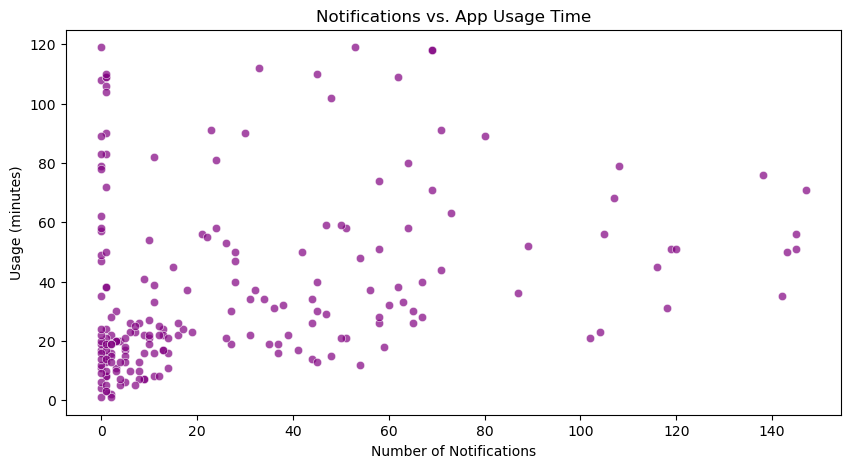

In [46]:
# Visualization 3: Scatter plot of Notifications vs. Usage Time


plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Notifications"], y=df["Usage (minutes)"], alpha=0.7, color="purple")
plt.title("Notifications vs. App Usage Time")
plt.xlabel("Number of Notifications")
plt.ylabel("Usage (minutes)")
plt.show()

In [47]:
# The scatter plot shows a weak correlation between the number of notifications and screen time. Some apps receive many notifications but aren't used for long, while others have high usage with fewer notifications.

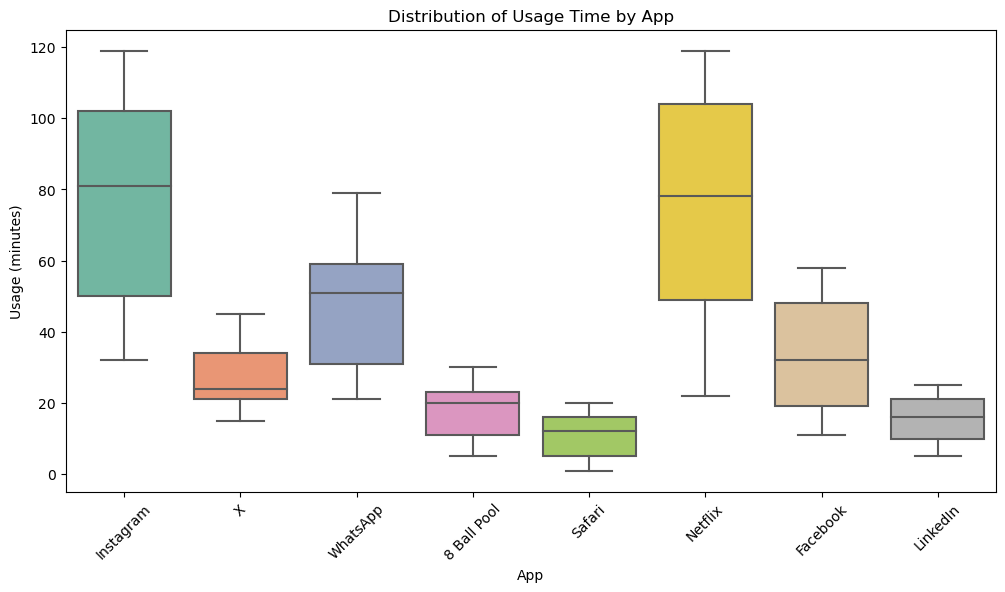

In [48]:
# Visualization 4: Boxplot of Usage (minutes) by App

plt.figure(figsize=(12, 6))
sns.boxplot(x="App", y="Usage (minutes)", data=df, palette="Set2")
plt.title("Distribution of Usage Time by App")
plt.xlabel("App")
plt.ylabel("Usage (minutes)")
plt.xticks(rotation=45)
plt.show()

In [49]:
# The boxplot shows the distribution of usage time for each app. Some apps have a wider spread of usage, indicating variability, while others have more consistent usage patterns.

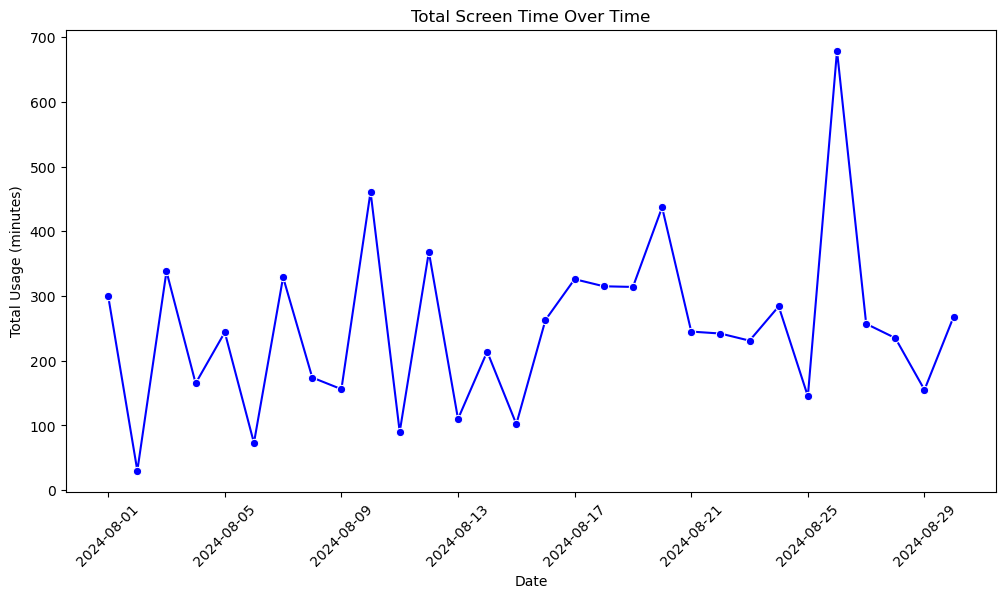

In [50]:
# Visualization 5: Daily Screen Time Trend

plt.figure(figsize=(12, 6))
daily_usage = df.groupby("Date")["Usage (minutes)"].sum()
sns.lineplot(x=daily_usage.index, y=daily_usage.values, marker="o", color="blue")
plt.title("Total Screen Time Over Time")
plt.xlabel("Date")
plt.ylabel("Total Usage (minutes)")
plt.xticks(rotation=45)
plt.show()

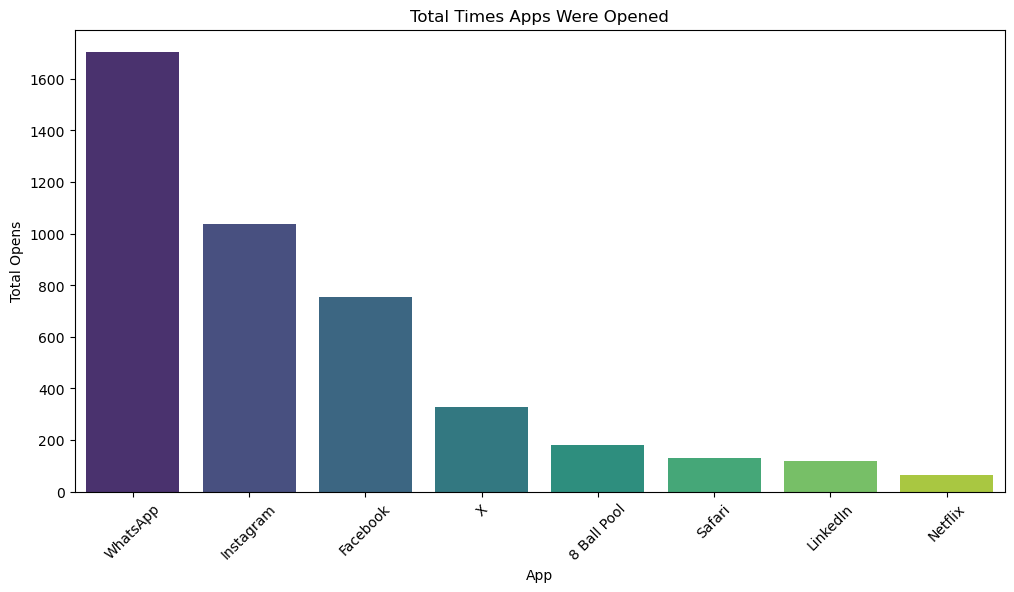

In [51]:
# Visualization 6: Total Times Opened per App


plt.figure(figsize=(12, 6))
app_opens = df.groupby("App")["Times Opened"].sum().sort_values(ascending=False)
sns.barplot(x=app_opens.index, y=app_opens.values, palette="viridis")
plt.title("Total Times Apps Were Opened")
plt.xlabel("App")
plt.ylabel("Total Opens")
plt.xticks(rotation=45)
plt.show()

In [52]:
# This bar chart reveals which apps are opened the most overall. Some apps may have a high number of opens but lower total usage time, indicating frequent but short sessions.

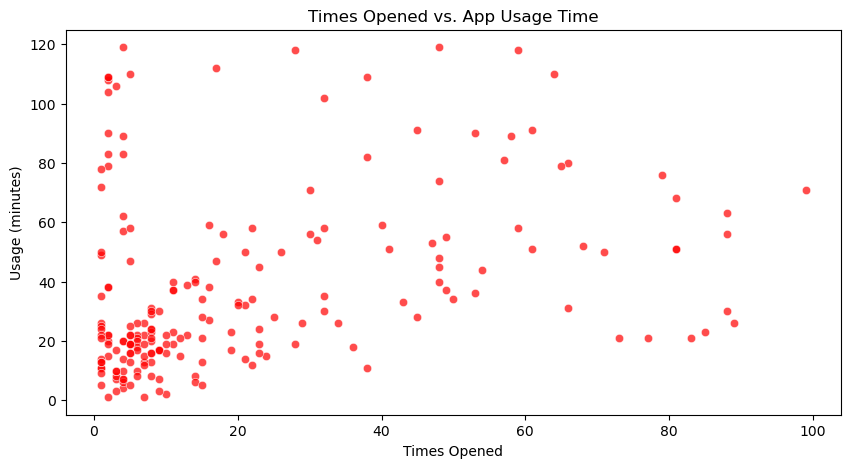

In [54]:
# Visualization 7: Scatter plot of Times Opened vs. Usage Time

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Times Opened"], y=df["Usage (minutes)"], alpha=0.7, color="red")
plt.title("Times Opened vs. App Usage Time")
plt.xlabel("Times Opened")
plt.ylabel("Usage (minutes)")
plt.show()

In [55]:
#conculation :


# Usage distribution: Most app usages are below 50 minutes, but some go over 100 minutes.

#Average usage per app: Identified the apps with the highest and lowest screen time.

# Notifications vs. Usage Time: Weak correlation—some apps have high notifications but low usage.

# Usage distribution by app: Certain apps have a wider spread in screen time.

# Daily screen time trend: Fluctuations in total screen time over time.

# Total times opened per app: Some apps are frequently opened but used for short durations.

# Times Opened vs. Usage: Scatter plot showing varying usage behaviors.